In [1]:
import pandas as pd  
import numpy as np  
from scipy import stats  
import seaborn as sns  
import matplotlib.pyplot as plt  

In [220]:
data= pd.read_csv("weatherHistory.csv")
data.drop(['Summary', 'Precip Type', 'Daily Summary'], axis=1, inplace=True)

# Prepare data  
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)  
data['Month'] = data['Formatted Date'].dt.month 

In [221]:
data.head(5)

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Month
0,2006-03-31 22:00:00+00:00,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,3
1,2006-03-31 23:00:00+00:00,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,3
2,2006-04-01 00:00:00+00:00,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,4
3,2006-04-01 01:00:00+00:00,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,4
4,2006-04-01 02:00:00+00:00,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,4


## WIZUALIZACJA TESTÓW STATYSTYCZNYCH

#### 1.WIZUALIZACJA T-STUDENT

kod wykonuje test t-Studenta, porównując średnie wartości dla każdej kolumny w pierwszej i drugiej połowie danych. Wynikowy wykres heatmap przedstawia statystyki t i wartości p dla każdej kolumny, co pozwala na szybkie porównanie wyników testów t-Studenta między różnymi atrybutami danych pogodowych.

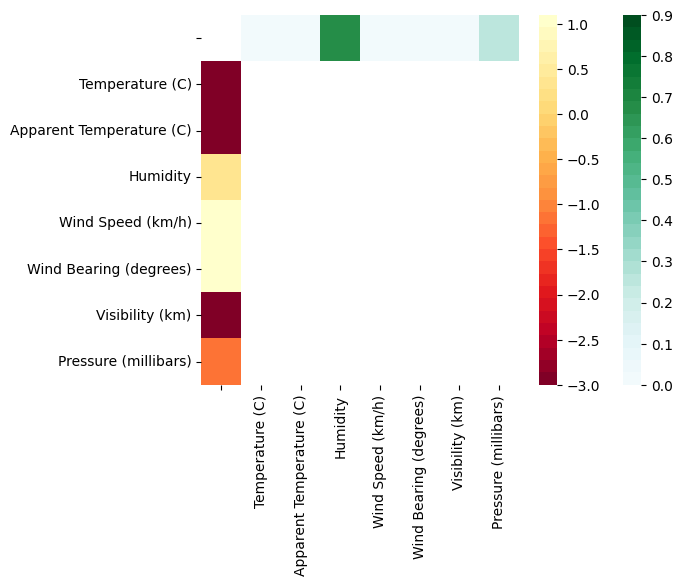

In [222]:
relevant_columns = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']  
  
# Split data into two halves  
first_half = data[:int(len(data) / 2)]  
second_half = data[int(len(data) / 2):]  
  
# Calculate t-statistics and p-values  
t_stats = []  
t_p_values = []  
  
for column in relevant_columns:  
    t_stat, t_p_value = stats.ttest_ind(first_half[column], second_half[column])  
    t_stats.append(t_stat)  
    t_p_values.append(t_p_value)  
  
# Create a DataFrame with t-statistics and p-values  
x = np.zeros((len(relevant_columns) + 1, len(relevant_columns) + 1))  
x[0, 1:] = t_p_values  
x[1:, 0] = t_stats  
x[1:, 1:] = np.nan  
df = pd.DataFrame(x, columns=[''] + relevant_columns, index=[''] + relevant_columns)  
  
mask_first_column = np.zeros_like(df, dtype=bool)
mask_first_column[0, :] = True

mask_first_row = np.zeros_like(df, dtype=bool)
mask_first_row[:, 0] = True
positives = sns.color_palette("BuGn", 30)  
small_positives = plt.get_cmap('YlOrRd', 30).reversed()  
# Plot the heatmap with masks
sns.heatmap(data=df, mask=mask_first_row, cmap=positives, vmin=0, vmax=0.9)
sns.heatmap(data=df, mask=mask_first_column, cmap=small_positives, vmin=-3, vmax=1.1)

# Show the plot
plt.show() 

Wynikowy wykres heatmap przedstawia statystyki t (pierwsza kolumna) i wartości p (pierwszy wiersz) dla każdej z kolumn danych pogodowych. Te wyniki pochodzą z testów t-Studenta, które porównują średnie wartości dla każdej kolumny w pierwszej i drugiej połowie danych.


Interpretacja wyników jest następująca:
Statystyka t: Wartość t-Stat dla każdej kolumny mierzy różnicę między średnimi wartościami w pierwszej i drugiej połowie danych, wyrażoną jako liczba odchylenia standardowego. Wartość dodatnia t-Stat wskazuje, że średnia wartość w pierwszej połowie danych jest większa niż w drugiej połowie, podczas gdy wartość ujemna t-Stat sugeruje, że średnia wartość w drugiej połowie danych jest większa niż w pierwszej połowie.
Wartość p: Wartość p dla każdej kolumny mierzy prawdopodobieństwo, że obserwowana różnica między średnimi wartościami w obu połowach danych wystąpiłaby przypadkowo, gdyby nie było żadnej rzeczywistej różnicy między nimi. Jeśli wartość p jest mniejsza niż ustalony próg istotności (np. 0,05), odrzucamy hipotezę zerową, że średnie wartości w obu połowach danych są takie same, na rzecz hipotezy alternatywnej, że istnieje istotna różnica między nimi.

Analizując wyniki na heatmapie, można zauważyć, że dla niektórych kolumn (np. "Temperature (C)", "Apparent Temperature (C)" i "Wind Bearing (degrees)"), wartości p są mniejsze niż 0,05, co sugeruje, że istnieje istotna różnica między średnimi wartościami tych kolumn w pierwszej i drugiej połowie danych. Dla innych kolumn, wartości p są większe niż 0,05, co wskazuje, że nie można odrzucić hipotezy zerowej, że średnie wartości w obu połowach danych są takie same.

##### 1.1 WIZUALIZACJA T-STUDENTA
-porównanie średnich pomiędzy wartościami miesięcy letnich a zimowych

In [223]:
relevant_columns = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']  


winter_data = data[data['Month'].isin([12, 1, 2])]  
summer_data = data[data['Month'].isin([6, 7, 8])] 
  
# Calculate t-statistics and p-values  
t_stats = []  
t_p_values = []  
  
for column in relevant_columns:  
    t_stat, t_p_value = stats.ttest_ind(winter_data[column], summer_data[column].mean())  
    t_stats.append(t_stat)  
    t_p_values.append(t_p_value)  
  
# Create a DataFrame with t-statistics and p-values  
x = np.zeros((len(relevant_columns) + 1, len(relevant_columns) + 1))  
x[0, 1:] = t_p_values  
x[1:, 0] = t_stats  
x[1:, 1:] = np.nan  
df = pd.DataFrame(x, columns=[''] + relevant_columns, index=[''] + relevant_columns)  
  
positives = sns.color_palette("BuGn", 30)  
small_positives = plt.get_cmap('YlOrRd', 30).reversed() 

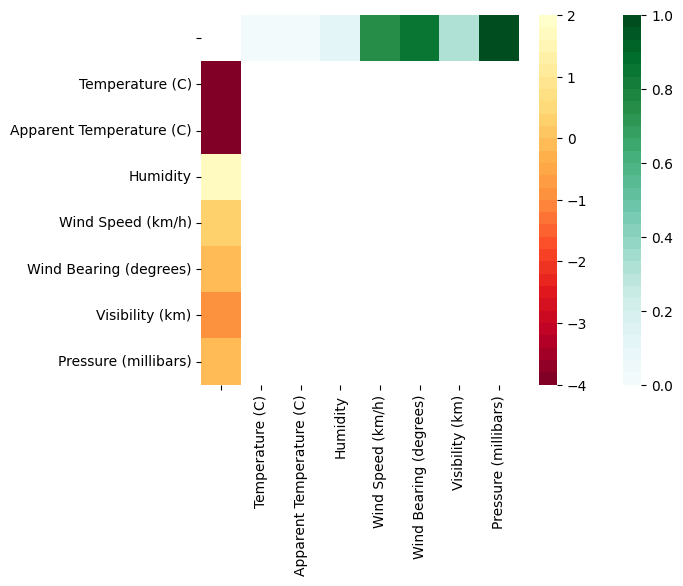

In [224]:
mask_first_column = np.zeros_like(df, dtype=bool)
mask_first_column[0, :] = True

mask_first_row = np.zeros_like(df, dtype=bool)
mask_first_row[:, 0] = True
positives = sns.color_palette("BuGn", 30)  
small_positives = plt.get_cmap('YlOrRd', 30).reversed()  
# Plot the heatmap with masks
sns.heatmap(data=df, mask=mask_first_row, cmap=positives, vmin=0, vmax=1)
sns.heatmap(data=df, mask=mask_first_column, cmap=small_positives, vmin=-4, vmax=2)

plt.show() 

In [225]:
t_p_mean=t_p_values.copy()

#### 2.WIZUALIZACJA - TEST BARTLETTA/LEVENA

kod wczytuje dane pogodowe, przekształca kolumnę 'Formatted Date' na obiekt datetime, wyodrębnia dane zimowe i letnie, a następnie przeprowadza testy Bartletta lub Levene'a na tych danych. Wyniki są przedstawione w formie map ciepła, które wizualizują wartości statystyk testowych i wartości p dla porównania wariancji cech pogodowych między sezonami zimowymi i letnimi.

C:\Users\ewelina.trybulowska\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


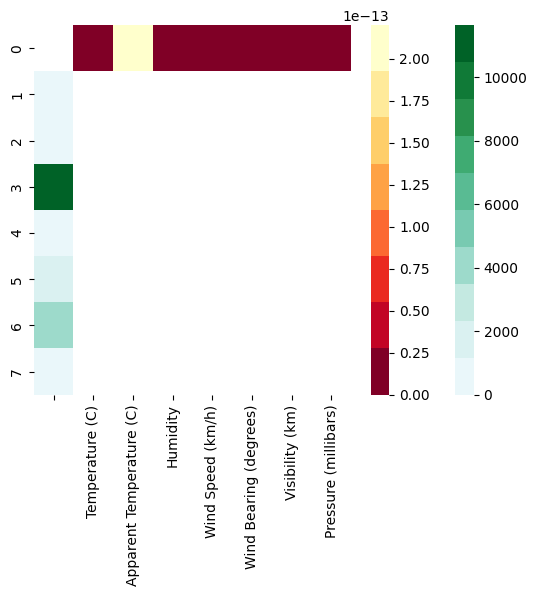

In [226]:
winter_data = data[data['Month'].isin([12, 1, 2])]  
summer_data = data[data['Month'].isin([6, 7, 8])]  

alpha = 0.05  
columns_to_test = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']  
t_stats = []  
t_p_values = []  
  
# H0: variance of summer_data = variance of winter_data  
# H1: variance of summer_data != variance of winter_data  
for column in columns_to_test:  
    summer_sample = summer_data[column]  
    winter_sample = winter_data[column]  
  
    summer_normal = stats.shapiro(summer_sample)[1] > alpha  
    winter_normal = stats.shapiro(winter_sample)[1] > alpha  
  
    if summer_normal and winter_normal:  
        # Use Bartlett's test if both distributions are normal  
        stat, p_value = stats.bartlett(summer_sample, winter_sample)  
        test_name = 'Bartlett'  
    else:  
        # Use Levene's test if either distribution is not normal  
        stat, p_value = stats.levene(summer_sample, winter_sample)  
        test_name = 'Levene'  
  
    t_stats.append(stat)  
    t_p_values.append(p_value)  

t_stats = np.array(t_stats).reshape(1, -1)  
t_p_values = np.array(t_p_values).reshape(-1, 1)  
  
x = np.zeros((len(columns_to_test) + 1, len(columns_to_test) + 1))  
x[0, 1:] = t_p_values.T  
x[1:, 0] = t_stats  
x[1:, 1:] = np.nan  
  
df = pd.DataFrame(x)  
column_names = [''] + columns_to_test  
df.columns = column_names  

df1_new = df.copy()  
df1_new.iloc[0, 1:] = False  
df1_new.iloc[1:, 0] = True  
df1_new.iloc[1:, 1:] = True
df1_new.iloc[0,0]=True  
  
df2_new = df.copy()  
df2_new.iloc[0, 1:] = True  
df2_new.iloc[1:, 0] = False  
df2_new.iloc[1:, 1:] = True
df2_new.iloc[0,0]=True 
  
positives = sns.color_palette("BuGn", 10)  
small_positives = plt.get_cmap('YlOrRd', 8).reversed()  
  
sns.heatmap(data=df, mask=(df2_new), cmap=positives, vmin=0, vmax=11640)  
sns.heatmap(data=df, mask=(df1_new), cmap=small_positives, vmin=0, vmax=2.199094977667925e-13)  
  
plt.show()  


Na wykresie ciepła, wartości statystyki testowej (t_stats) i wartości p (t_p_values) dla danych zimowych i letnich są przedstawione za pomocą dwóch różnych palet kolorów: positives (jasnozielone do ciemnozielonych) dla wartości p i small_positives (żółte do czerwone) dla wartości statystyki testowej.

Interpretując wyniki na wykresie ciepła, można zauważyć, które zmienne mają istotne różnice między wariancjami danych zimowych i letnich (na podstawie wartości p), a także ocenić wielkość tych różnic (na podstawie wartości statystyki testowej).

Interpretacja danych na wykresie ciepła:
-->Wartości statystyki testowej (t_stats): Kolory w kolumnie 0 (pierwszej kolumnie) wykresu ciepła przedstawiają wartości statystyki testowej (t_stats) dla każdej zmiennej (kolumny). Im ciemniejszy kolor, tym większa wartość statystyki testowej, co może sugerować większą różnicę między wariancjami danych zimowych i letnich.
-->Wartości p (t_p_values):  Kolory w wierszu 0 (pierwszym wierszu)wykresu ciepła przedstawiają wartości p dla każdej zmiennej (wiersza). Im ciemniejszy kolor, tym niższa wartość p.

--> Jeśli wartość p jest mniejsza niż alfa, odrzucamy hipotezę zerową (H0) na rzecz hipotezy alternatywnej (H1) i uważamy, że istnieje istotna statystycznie różnica między wariancjami danych zimowych i letnich dla danej zmiennej. Jeśli wartość p jest większa niż alfa, nie ma wystarczających dowodów, aby odrzucić hipotezę zerową, co oznacza, że wariancje są równoważne.

#### 3.WIZUALIZACJA  - porównanie jednocześnie średnich i wariancji pomiędzy miesiącami letnimi a zimowymi

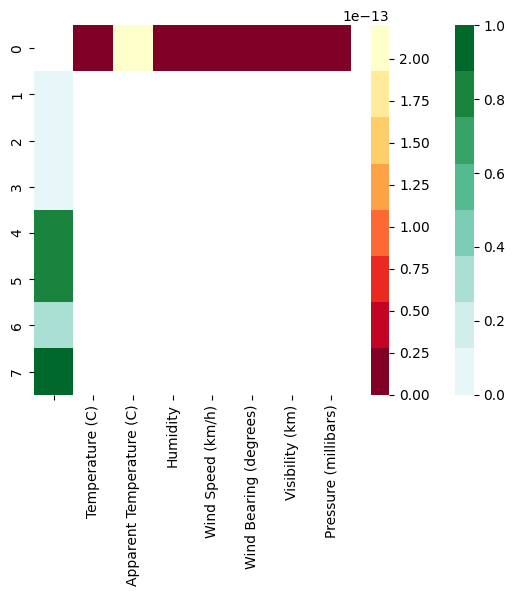

In [227]:
t_p_val = t_p_values.reshape(7) 
x = np.zeros((len(columns_to_test) + 1, len(columns_to_test) + 1))
x[0,1:]=t_p_val
x[1:,0]=t_p_mean
x[1:,1:]=np.nan
x[0,0]=np.nan
df = pd.DataFrame(x)

# Add column names

column_names = [''] + columns_to_test  
df.columns = column_names 

positives = sns.color_palette("BuGn",20)
small_positives = plt.get_cmap('YlOrRd',20).reversed()

mask_first_column = np.zeros_like(df, dtype=bool)
mask_first_column[0, :] = True

mask_first_row = np.zeros_like(df, dtype=bool)
mask_first_row[:, 0] = True
positives = sns.color_palette("BuGn", 8)  
small_positives = plt.get_cmap('YlOrRd', 8).reversed()  
# Plot the heatmap with masks
sns.heatmap(data=df, mask=mask_first_column, cmap=positives, vmin=0, vmax=1)
sns.heatmap(data=df, mask=mask_first_row, cmap=small_positives, vmin=0, vmax=2.199095e-13)

plt.show() 